#GradCam Implementation

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session9'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
import torchvision
import numpy as np
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate
from utils import gradcam
from utils import gradvisualize
from utils import utilities
from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, ToFloat, Rotate, Cutout,VerticalFlip
from albumentations.pytorch import ToTensor

In [7]:
classes, trainloader, testloader = datapreparation.load(True)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


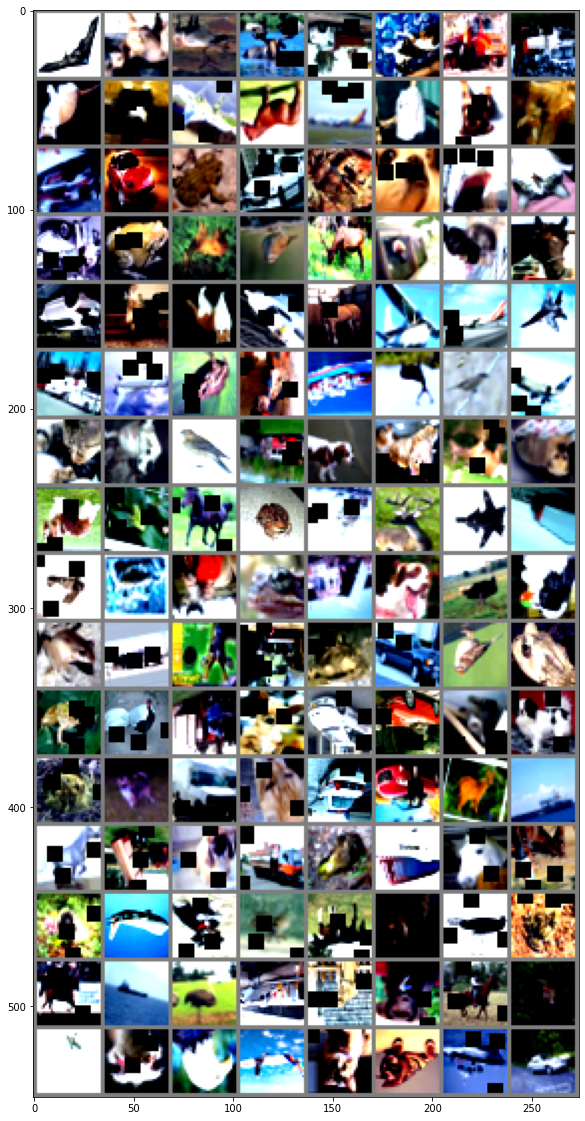

In [8]:
display.show_images(trainloader, classes, 20)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = resnet.ResNet18()
model = net.to(device)
summary(model,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [14]:
EPOCHS = 10
misclassified_imgs = []
correct_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    misclassified_imgs, correct_imgs = training.test_model(model, device, criterion, testloader, epoch==EPOCHS-1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.33931905031204224 Batch_id=390 Accuracy=91.40: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8615/10000 (86.15%)

EPOCH: 2


Loss=0.16091394424438477 Batch_id=390 Accuracy=91.48: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8750/10000 (87.50%)

EPOCH: 3


Loss=0.26857608556747437 Batch_id=390 Accuracy=91.88: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8788/10000 (87.88%)

EPOCH: 4


Loss=0.20764335989952087 Batch_id=390 Accuracy=92.27: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8641/10000 (86.41%)

EPOCH: 5


Loss=0.2226797342300415 Batch_id=390 Accuracy=92.29: 100%|██████████| 391/391 [01:01<00:00,  6.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8823/10000 (88.23%)

EPOCH: 6


Loss=0.22012028098106384 Batch_id=390 Accuracy=92.45: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8805/10000 (88.05%)

EPOCH: 7


Loss=0.18424125015735626 Batch_id=390 Accuracy=92.89: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8840/10000 (88.40%)

EPOCH: 8


Loss=0.3206600844860077 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8695/10000 (86.95%)

EPOCH: 9


Loss=0.26910924911499023 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8819/10000 (88.19%)

EPOCH: 10


Loss=0.24086609482765198 Batch_id=390 Accuracy=93.35: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]



Test set: Average loss: 0.0031, Accuracy: 8835/10000 (88.35%)



In [38]:
target_layers = ['layer1','layer2','layer3','layer4']
viz_cam = gradvisualize.VisualizeCam(model, classes, target_layers)
print(viz_cam)

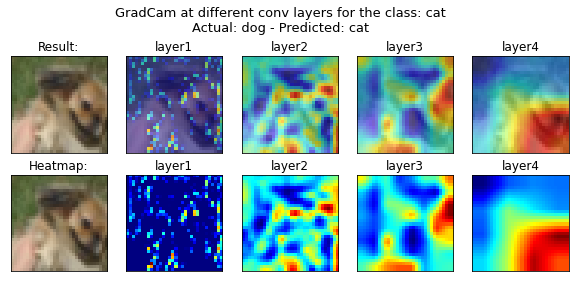

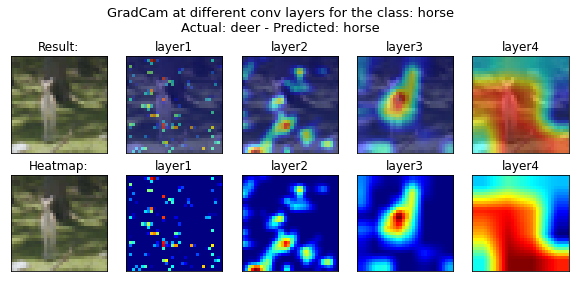

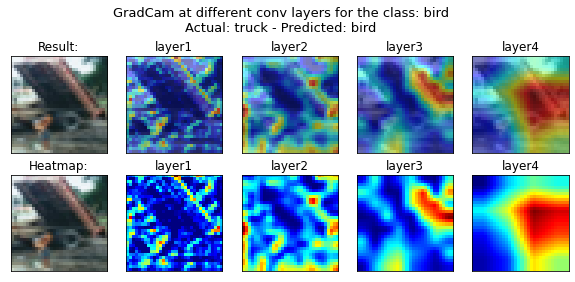

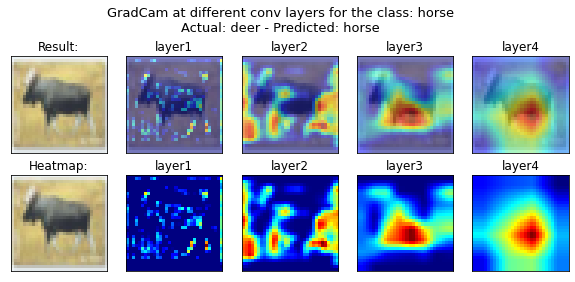

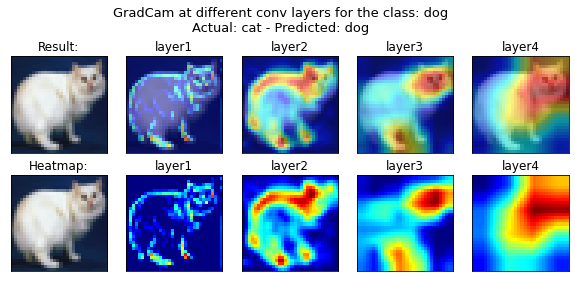

In [44]:
#GradCam for incorrectly classified images

num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
  #incorrect_pred_imgs
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")